In [1]:
# from IPython.display import Image
from PIL import Image
import pandas as pd

# general approaches for metrics optimization

## Loss and Metric

- **Target metric** is what *we* want to optimize
- **Optimization loss** is what *model* optimizes

## Approaches for target metric optimization in general
- target metric == optimization loss -> 그냥 모델 돌려
    - MSE, LogLoss
    
- preprocess train and optimize another metric
    - MSPE, MAPE, RMSLE

- optimize another metric, postprocess predictions
    - accuracy, weighted Kappa

- custom loss function
    - 함수를 정의하면 되는데. 예측값, 실제 값이 들어왔을 때, grad(1차미분), hess(2차미분) 를 return하면 된다.
    
- early stopping
    - training metric과 validation metric 값을 보면서 stopping point에서 stop한다
    

# Regression metrics optimization

## 1. MSE
### Available model
- tree-based
> XGBoost, LightGBM
>
> sklearn.RandomForestRegressor

- Linear models
> sklearn.<>Regression
>
> sklearn.SGDRegressor
>
> Vowpal Wabbit (quantile loss)

- Neural nets 
> PyTorch, Keras, TF etc.

**Synonyms : L2 Loss**

## 2. MAE
MSE보다 최적화 오래걸림

### Available model
- tree-based
> LightGBM
>
> sklearn.RandomForestRegressor

- Linear models
> sklearn.SGDRegressor (MAE는 없지만 Huber loss가 MAE와 비슷한 개념)
>
> Vowpal Wabbit (MAE는 없지만. MAE가 quantile loss의 한 종류, quantile loss로 하면됨.)

- Neural nets 
> PyTorch, Keras, TF etc.
>
> library에 MAE가 있진 않지만, custom function 만들어서 넣음 됨.

**Synonyms : L1, Median regression**


### Huber loss

- error가 작을 때는. MSE로 계산 => error를 0으로 안전하게 도달.
- error가 클때는 MAE로 계산 => robustness

Huber loss


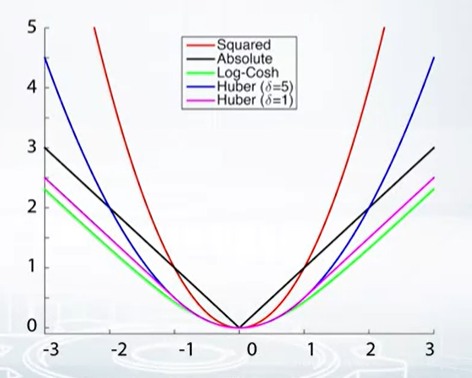

In [4]:
print('Huber loss')
Image.open('img10.png')

## 3. MSPE, MAPE

### 1) custom function 만들기

### 2) MSPE(MAPE) as weighted MSE(MAE)

#### 모델에서 sample weight 활용하기

- 각 sample 에 대한 weight는 다음과 같음.
- target 값이 작을 수록 모델에서 해당 object가 중요하게 작용.
- 여러 library에 'sample_weights'라는 파라미터가 있는데 여기에 아래 사진의 sample weight를 넣는다.
    - 그리고 objective는 MSE or MAE로 하고
    - xgboost, lgbm, neural net 다 가능

#### train set을 resample하기
- df.sample(weights = sample_weights) 해서 resample하고
    - 팁: model에 fitting할 때마다 여러번 resample해서 prediction을 average하셈. => more stable 
- MSE MAE를 쓰는 모델 아무거나 쓰면 됨.
- 근데 핵심은 test set에는 아무것도 하면 안됨. 

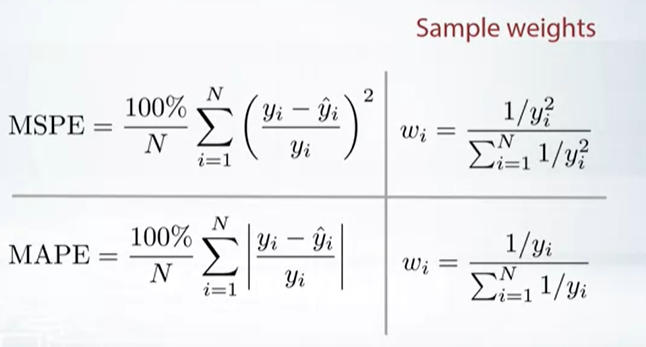

In [8]:
Image.open('img11.png')

## 3. RMSLE

### for train
1. transform target
$$
z_i = log(y_i + 1)
$$
2. fit a model with MSE 

### for test
1. transform predictions back
$$
\hat y_i = exp(\hat z_i) -1 
$$